# Robert's First Lab Assignment for Nano 281

## Q1 - Materials Project data

In [5]:
#import necessary packages
from pymatgen import MPRester
import numpy as np
import seaborn as sns
from scipy import stats
from pprint import pprint
import pandas as pd
from io import StringIO
import requests
%matplotlib inline
#set up Materials Project query method with API Key
m = MPRester("Rxy9xMBBfweUTh2XbOv")

**Testing method of getting ABO3s**

In [6]:
test_data = m.get_data("**O3", prop="pretty_formula")
#pprint(test_data)

In [7]:
test_data2 = m.query(criteria="**O3", properties=["pretty_formula"])
#pprint(test_data2)

**Checking code to get properties for one compound**

In [8]:
properties_list = ["task_id","pretty_formula","nsites","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"]
test_data3 = m.query(criteria="LiNbO3", properties=properties_list)
#pprint(test_data3)

**Displaying the list of data columns that the materials project stores about compounds**

This makes it easy to reference these properties by name

In [9]:
data1=m.get_data('Li2O')
df1 = pd.DataFrame(data=data1)
pprint(df1.columns)

Index(['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom',
       'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard',
       'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible',
       'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids',
       'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags',
       'elasticity', 'piezo', 'diel', 'full_formula'],
      dtype='object')


## Q1.1
*Running the command to get desired data for all ABO3 compounds*

*Convert to Pandas Dataframe*

In [10]:
properties_list = ["task_id","pretty_formula","nsites","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"]
mats_data = m.query(criteria="**O3", properties=properties_list)
mats_df = pd.DataFrame(data=mats_data)

#pprint(mats_data[0:5])
mats_df.head(5)

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
0,mp-1001571,CaFeO3,5,0.0000,-2.293058,[],0.051334
1,mp-1016821,BaSiO3,5,0.9508,-2.860806,[],0.562072
2,mp-1016823,BaGeO3,5,0.0000,-2.480763,[],0.234014
3,mp-1016828,CdIrO3,5,0.0000,-0.846333,[],0.466713
4,mp-1016833,CaRhO3,5,0.0000,-1.846958,[],0.269316


## Q1.2
*How many ABO3 compounds in total are there in the Materials Project?*

**2336**

*How many unique ABO3 formulae are there?*

**1308**

*What is the average number of crystals (also known as polymorphs) per ABO3 formula?*

**1.786**

In [11]:
len(mats_df.index)

2336

In [12]:
formulae = mats_df['pretty_formula']
unique_formulae = mats_df.groupby(['pretty_formula'])
unique_formulae.size()

pretty_formula
AcAlO3    1
AcBO3     1
AcCrO3    1
AcCuO3    1
AcFeO3    1
         ..
ZrPbO3    5
ZrSiO3    1
ZrTiO3    1
ZrTlO3    1
ZrZnO3    1
Length: 1308, dtype: int64

In [13]:
type(unique_formulae)

pandas.core.groupby.generic.DataFrameGroupBy

In [14]:
unique_formulae.count().mean()

task_id                      1.785933
nsites                       1.785933
band_gap                     1.785933
formation_energy_per_atom    1.785933
icsd_ids                     1.785933
e_above_hull                 1.785933
dtype: float64

In [15]:
unique = {}
for i in formulae:
    if i not in unique:
        unique[i] = 1
    else:
        unique[i] += 1
        
length_unique = len(unique)
length_total = len(mats_df.index)
print("average polymorphs/formula: ",length_total/length_unique)

average polymorphs/formula:  1.7859327217125383


## Q1.3

*What fraction of the compounds have at least one icsd id?*

**~0.365**

In [16]:
icsd = mats_df['icsd_ids']

In [17]:
mats_df.describe(include="all")

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
count,2336,2336,2336.000000,2336.000000,2336.000000,2336,2336.000000
unique,2336,1308,NaN,NaN,NaN,854,NaN
top,mp-3323,MgSiO3,NaN,NaN,NaN,[],NaN
freq,1,33,NaN,NaN,NaN,1483,NaN
mean,NaN,NaN,16.746575,1.244224,-2.276728,NaN,0.230641
std,NaN,NaN,17.761494,1.595942,0.876602,NaN,0.368280
min,NaN,NaN,5.000000,0.000000,-4.048479,NaN,0.000000
25%,NaN,NaN,5.000000,0.000000,-2.909511,NaN,0.013483
50%,NaN,NaN,10.000000,0.175800,-2.349287,NaN,0.079189
75%,NaN,NaN,20.000000,2.465150,-1.648835,NaN,0.306340


In [18]:
icsds = []
for i in mats_df['icsd_ids']:
    if i:
        icsds.append(i)
len(icsds)/len(mats_df['icsd_ids'])

0.3651541095890411

## Q1.4

In [19]:
print(mats_data[1])
print(mats_data[1]['formation_energy_per_atom'])

{'task_id': 'mp-1016821', 'pretty_formula': 'BaSiO3', 'nsites': 5, 'band_gap': 0.9508000000000001, 'formation_energy_per_atom': -2.860805794250001, 'icsd_ids': [], 'e_above_hull': 0.5620722189999974}
-2.860805794250001


In [20]:
convert = 1.602e-19*6.022e23
mats_data[1]['formation_energy_per_atom'] * convert

-275988.91533743555

In [21]:
for i in mats_data:
    i['molar_formation_energy_per_atom']=i['formation_energy_per_atom']*convert

In [22]:
print(mats_data[1])

{'task_id': 'mp-1016821', 'pretty_formula': 'BaSiO3', 'nsites': 5, 'band_gap': 0.9508000000000001, 'formation_energy_per_atom': -2.860805794250001, 'icsd_ids': [], 'e_above_hull': 0.5620722189999974, 'molar_formation_energy_per_atom': -275988.91533743555}


In [23]:
mats_df_updated =  pd.DataFrame(data=mats_data)

In [24]:
mats_df_updated.describe()

,nsites,band_gap,formation_energy_per_atom,e_above_hull,molar_formation_energy_per_atom
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,16.746575,1.244224,-2.276728,0.230641,-219641.475865
std,17.761494,1.595942,0.876602,0.368280,84567.957028
min,5.000000,0.000000,-4.048479,0.000000,-390566.623638
25%,5.000000,0.000000,-2.909511,0.013483,-280687.580674
50%,10.000000,0.175800,-2.349287,0.079189,-226641.477311
75%,20.000000,2.465150,-1.648835,0.306340,-159067.141531
max,240.000000,5.831800,1.980131,4.190670,191028.075963


## Q1.5

In [25]:
mats_df_updated['e_above_hull']

0       0.051334
1       0.562072
2       0.234014
3       0.466713
4       0.269316
          ...   
2331    0.137663
2332    0.083596
2333    0.181680
2334    0.161013
2335    0.477305
Name: e_above_hull, Length: 2336, dtype: float64

In [26]:
#assign stability property to each compound
stability = []
for i in mats_df_updated['e_above_hull']:
    if i > 0.03:
        stability.append('unstable')
        #print(i, 'unstable')
    elif i <= 0.03:
        stability.append('stable')
        #print(i, 'stable')

In [27]:
mats_df_updated['stability'] = stability

In [28]:
#assign metallic character property to each compound
metallic_character = []
for i in mats_df_updated['band_gap']:
    if i == 0:
        metallic_character.append('metallic')
        #print(i, 'metallic')
    elif i > 0 and i < 1:
        metallic_character.append('small band gap')
        #print(i, 'small band gap')
    elif i >= 1:
        metallic_character.append('large band gap')
        #print(i, 'large band gap')

In [29]:
mats_df_updated['metallic_character'] = metallic_character

In [30]:
mats_df_updated.describe(include='all')

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,molar_formation_energy_per_atom,stability,metallic_character
count,2336,2336,2336.000000,2336.000000,2336.000000,2336,2336.000000,2336.000000,2336,2336
unique,2336,1308,NaN,NaN,NaN,854,NaN,NaN,2,3
top,mp-3323,MgSiO3,NaN,NaN,NaN,[],NaN,NaN,unstable,metallic
freq,1,33,NaN,NaN,NaN,1483,NaN,NaN,1549,1077
mean,NaN,NaN,16.746575,1.244224,-2.276728,NaN,0.230641,-219641.475865,NaN,NaN
std,NaN,NaN,17.761494,1.595942,0.876602,NaN,0.368280,84567.957028,NaN,NaN
min,NaN,NaN,5.000000,0.000000,-4.048479,NaN,0.000000,-390566.623638,NaN,NaN
25%,NaN,NaN,5.000000,0.000000,-2.909511,NaN,0.013483,-280687.580674,NaN,NaN
50%,NaN,NaN,10.000000,0.175800,-2.349287,NaN,0.079189,-226641.477311,NaN,NaN
75%,NaN,NaN,20.000000,2.465150,-1.648835,NaN,0.306340,-159067.141531,NaN,NaN


In [31]:
#create table of compounds in each category
cat_dict = {}
for i in range(0,len(mats_df_updated['metallic_character'])):
        category = mats_df_updated['metallic_character'][i] + ', ' + mats_df_updated['stability'][i]
        if category in cat_dict:
            cat_dict[category] += 1
        else:
            cat_dict[category] = 1

**answer to Q1.5**

In [32]:
pprint(cat_dict)

{'large band gap, stable': 530,
 'large band gap, unstable': 411,
 'metallic, stable': 152,
 'metallic, unstable': 925,
 'small band gap, stable': 105,
 'small band gap, unstable': 213}


In [33]:
sum = 0
for i in cat_dict:
    sum += cat_dict[i]
print(sum)

2336


## Q1.6

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Formation Energy (eV/atom)')]

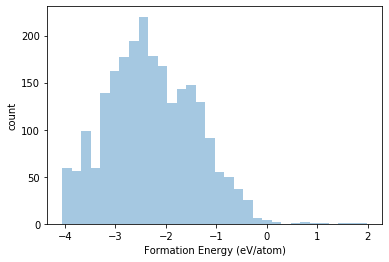

In [34]:
e_form = sns.distplot(mats_df_updated["formation_energy_per_atom"], kde=False)
e_form.set(xlabel = 'Formation Energy (eV/atom)',
          ylabel = 'count')

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Band Gap (eV)')]

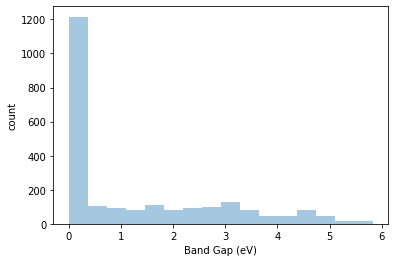

In [35]:
bg_plot = sns.distplot(mats_df_updated["band_gap"], kde=False)
bg_plot.set(xlabel = 'Band Gap (eV)',
          ylabel = 'count')

## Q2 - Publicly available research data

## Q2.1

In [36]:
url="https://ndownloader.figshare.com/files/9158587"
raw = requests.get(url).text
OQMD_data = pd.read_csv(StringIO(raw))

In [37]:
OQMD_data.describe(include = 'all')

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
count,5329,5329,5329,5329,5329,5329,5329.000000,5329.000000,5329,5329,...,5329,5329,5329,5329,5329,5329,5329,5329,5329,5329
unique,5329,73,73,2,7,7,NaN,NaN,5,2847,...,910,4082,945,2142,2145,2581,125,126,124,4157
top,EuDyO3,Np,Np,False,not balanced,not balanced,NaN,NaN,cubic,-,...,0.000,-,0.000,-,-,-,90.0,90.0,90.0,-
freq,1,73,73,5107,1881,1881,NaN,NaN,3253,53,...,1148,53,4132,53,53,53,4953,4953,4953,415
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.974656,0.817846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.337139,0.247479,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.270000,0.270000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.690000,0.630000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.930000,0.770000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.180000,0.950000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q2.2

In [38]:
len(OQMD_data['Chemical formula'])

5329

## Q2.3

In [39]:
sum = 0
for i in OQMD_data:
    sum += 1
    print(i)
print('\n*total columns* ', sum)

Chemical formula
A
B
In literature
Valence A
Valence B
Radius A [ang]
Radius B [ang]
Lowest distortion
Formation energy [eV/atom]
Stability [eV/atom]
Magnetic moment [mu_B]
Volume per atom [A^3/atom]
Band gap [eV]
a [ang]
b [ang]
c [ang]
alpha [deg]
beta [deg]
gamma [deg]
Vacancy energy [eV/O atom]

*total columns*  21


## Q2.4

In [40]:
data_column = 'Formation energy [eV/atom]'
OQMD_data[data_column].apply(type).value_counts

<bound method IndexOpsMixin.value_counts of 0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
5324    <class 'str'>
5325    <class 'str'>
5326    <class 'str'>
5327    <class 'str'>
5328    <class 'str'>
Name: Formation energy [eV/atom], Length: 5329, dtype: object>

In [ ]:
#remove '-' characters
clean_OQMD = (OQMD_data[OQMD_data[data_column] != '-'])
clean_column = clean_OQMD["Formation energy [eV/atom]"]
#replace column of strings with column of floats
wrangled_OQMD = clean_OQMD.drop(data_column, axis=1).join(clean_column.apply(pd.to_numeric))
print('\n*total data points remaining*: ', len(wrangled_OQMD["Formation energy [eV/atom]"]))

## Q2.5

Text(0, 250, 'Mean: -1.68\nStd: 0.98')

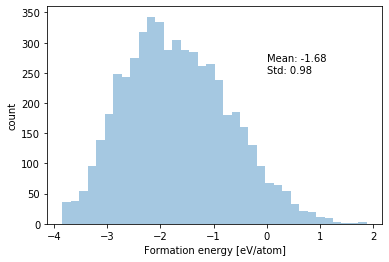

In [37]:
e_form_2 = sns.distplot(wrangled_OQMD["Formation energy [eV/atom]"], kde=False)
e_form_2.set(ylabel = 'count')
e_form_2.text(0,250,"Mean: -1.68\nStd: 0.98")

## Q3 - Comparing data sets

## Q3.1

In [48]:
mats = mats_df_updated['pretty_formula']
oqmd = wrangled_OQMD['Chemical formula']
print('Unique shared formulas: ', len(set(mats).intersection(oqmd)))

Unique shared formulas:  1194


In [39]:
intersection = pd.merge(wrangled_OQMD,mats_df_updated,left_on=['Chemical formula'], 
         right_on=['pretty_formula'], how = "inner")
intersection['Formation energy [eV/atom]'].describe()

count    2054.000000
mean       -2.061603
std         0.890355
min        -3.844000
25%        -2.784000
50%        -2.117000
75%        -1.397500
max         1.110000
Name: Formation energy [eV/atom], dtype: float64

In [40]:
intersection['formation_energy_per_atom'].describe()

count    2054.000000
mean       -2.367373
std         0.850635
min        -4.048479
25%        -2.981610
50%        -2.426571
75%        -1.761533
max         1.980131
Name: formation_energy_per_atom, dtype: float64

Text(0, 110, 'OQMD:\nMean=-2.06\nStd=0.89')

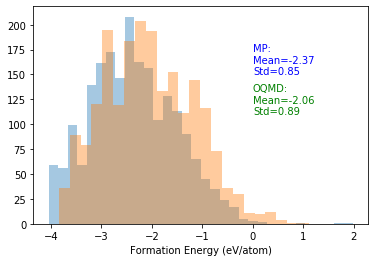

In [41]:
plot_mats_proj = sns.distplot(intersection['formation_energy_per_atom'], kde = False, axlabel = "Formation Energy (eV/atom)")
plot_oqmd = sns.distplot(intersection['Formation energy [eV/atom]'], kde = False, axlabel = "Formation Energy (eV/atom)")
plot_mats_proj.text(0,150,"MP:\nMean=-2.37\nStd=0.85", color="b")
plot_oqmd.text(0,110,"OQMD:\nMean=-2.06\nStd=0.89", color="g")

In [ ]:
# Check variances to determine which t test to use

In [52]:
np.var(intersection['formation_energy_per_atom'])

0.7232268906095886

In [53]:
np.var(intersection['Formation energy [eV/atom]'])

0.7923467632029174

In [56]:
stats.ttest_ind(intersection['Formation energy [eV/atom]'], intersection['formation_energy_per_atom'], equal_var=False)

Ttest_indResult(statistic=11.25385003909726, pvalue=5.872346931471078e-29)

**Conclusion**

Given the low p-value of ~6e-29, we can conclude that there is a significant difference in the mean formation energy in these two data sets. It is possible that the DFT functionals used to compute the formation energies compounds in the OQMD database tend to underestimate the energy values relative to the values in the materials project. This would make sense assuming that the energies in the Mats Project are calculated individually while OQMD database values all go through the HT-DFT method, which might make some accuracy sacrifices for the sake of performance.